# 📘 CESAR DANIEL RINCÓN BRITO  
## UNIVERSIDAD JAVERIANA CALI  

---

# PREDICCIÓN DE VENTAS POR IDENTIFICACIÓN DISPERSA DE UN SISTEMA ERP A PARTIR DE DATOS DE UN MÓDULO POS  
# SALES FORECASTING VIA SPARSE IDENTIFICATION OF AN ERP SYSTEM USING POS MODULE DATA
---

### OBJETIVO  / OBJECTIVE 
**Adaptar un método de identificación de la dinámica de sistemas no lineales dispersos para predecir el comportamiento de las ventas del módulo POS de un sistema ERP.**

**To adapt a sparse nonlinear system dynamics identification method for predicting the sales behavior in the POS module of an ERP system.**


In [1]:
# Import pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Leer el archivo CSV (dataset con train/val/test: 1201 registros)
# Train: 976 registros (2022-01-02 a 2024-09-06)
# Val: 109 registros (2024-09-07 a 2024-12-24)
# Test: 109 registros (2025-09-07 a 2025-12-24)
df = pd.read_csv('../ERP-POS-Data/Sales-CSV-1201-Train-Value-Test.csv', delimiter=',')
print(f"Dataset cargado: {len(df)} registros")
display(df)

In [ ]:
# Configuración Train/Val/Test
V_TRAIN = 0.90  # 90% train
V_TEST_VALIDATION = True  # True = validación, False = dividir en val/test
V_HEAD_DATA = 1085  # Usar primeros 1085 registros para train+val

V_TEST_SIZE = 1-V_TRAIN  # 10% para validación
V_TEST_SPLIT = 0.5  # No se usa cuando V_TEST_VALIDATION = True

# Distribución del dataset (1201 registros totales):
# - Train: 976 registros (índices 0-975) | 2022-01-02 a 2024-09-06
# - Val: 109 registros (índices 976-1084) | 2024-09-07 a 2024-12-24
# - Test: 109 registros (índices 1092-1200) | 2025-09-07 a 2025-12-24

print(f"Configuración: {V_TRAIN*100:.0f}% train / {(1-V_TRAIN)*100:.0f}% val")
print(f"Datos para train+val: {V_HEAD_DATA}")
print(f"Datos para test: índices 1092-1200 (109 registros)")

In [4]:
y_trainDatos =  df['TotalVentaNeta'].head(V_HEAD_DATA) #Variable dependiente a predecir
#Variables control--------------------------------------------
r_trainDatos =  df['Pico_B_M_A'].head(V_HEAD_DATA) #0.81
x_trainDatos =  df['UnidadesKit'].head(V_HEAD_DATA)
n_trainDatos =  df['VentasCENTROORIENTE'].head(V_HEAD_DATA) #
k_trainDatos =  df['VentasOCCIDENTE'].head(V_HEAD_DATA) #
l_trainDatos =  df['VentasNORTE'].head(V_HEAD_DATA) #
u_trainDatos =  df['EsFechaEspecial'].head(V_HEAD_DATA) 
#-------------------------------------------------------------


In [5]:
# Escalar
#StandardScaler escala cada columna para que tenga media 0 y desviación estándar 1.
# MinMaxScaler mantiene datos postivos
scaler_y = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
y_trainDatos_scaled = scaler_y.fit_transform(y_trainDatos.values.reshape(-1, 1))

scaler_r = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
r_trainDatos_scaled = scaler_r.fit_transform(r_trainDatos.values.reshape(-1, 1))

scaler_x = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
x_trainDatos_scaled = scaler_x.fit_transform(x_trainDatos.values.reshape(-1, 1))

scaler_n = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
n_trainDatos_scaled = scaler_n.fit_transform(n_trainDatos.values.reshape(-1, 1))

scaler_k = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
k_trainDatos_scaled = scaler_k.fit_transform(k_trainDatos.values.reshape(-1, 1))

scaler_l = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
l_trainDatos_scaled = scaler_l.fit_transform(l_trainDatos.values.reshape(-1, 1))

scaler_u = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
u_trainDatos_scaled = scaler_u.fit_transform(u_trainDatos.values.reshape(-1, 1))
##---------------------------------------------------------------------------------


In [6]:
#Validacion y Test en %
#tiempos-------------------------------------------------------------------------------------------------
N = len(x_trainDatos)
# Paso 1: obtener 85% train y 15% restante
t_train_data, temp_data = train_test_split(list(range(N)), test_size=V_TEST_SIZE, shuffle=False)

# Paso 2: Dividir el conjunto temporal (15%) en 5% validación y 10% test
if V_TEST_VALIDATION:
    t_val_data = temp_data
    t_test_data = [] #or the same -> temp_data
else:
    t_val_data, t_test_data = train_test_split(temp_data, test_size=V_TEST_SPLIT, shuffle=False)

In [7]:
##

In [8]:
#Datos Salida y_trainDatos - Venta
#Datos entrada y_trainDatos_scaled
# Dividir 85% para entrenamiento y 15% para validación y prueba
y_train, y_temp = train_test_split(y_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

# Dividir el % restante en 5% validación y 10% test

if V_TEST_VALIDATION:
    y_val = y_temp
    y_test = []  #or the same -> y_temp
else:
    y_val, y_test = train_test_split(y_temp, test_size=V_TEST_SPLIT, random_state=42)

In [9]:
# r_: Pico_B_M_A
# Dividir % para entrenamiento y % para validación y prueba
r_train, r_temp = train_test_split(r_trainDatos, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

if V_TEST_VALIDATION:
    r_val = r_temp
    r_test = []  #or the same -> r_temp
else:
    r_val, r_test = train_test_split(r_temp, test_size=V_TEST_SPLIT, random_state=42)

In [10]:
#x_: UnidadesKit
# Dividir % para entrenamiento y % para validación y prueba dependiendo de variable de confg.
x_train, x_temp = train_test_split(x_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

# Dividir el % restante en % para validación y % para prueba
if V_TEST_VALIDATION:
    x_val = x_temp
    x_test = []  #or the same -> x_temp
else:
    x_val, x_test = train_test_split(x_temp, test_size=V_TEST_SPLIT, random_state=42)

In [11]:
#n_: VentasCENTROORIENTE
# Dividir % para entrenamiento y % para validación y prueba
n_train, n_temp = train_test_split(n_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

# Dividir el % restante en % para validación y % para prueba

if V_TEST_VALIDATION:
    n_val = n_temp
    n_test = []  #or the same -> n_temp
else:
    n_val, n_test = train_test_split(n_temp, test_size=V_TEST_SPLIT, random_state=42)

In [12]:
#k_: VentasOCCIDENTE
# Dividir % para entrenamiento y % para validación y prueba
k_train, k_temp = train_test_split(k_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

# Dividir el % restante en % para validación y % para prueba

if V_TEST_VALIDATION:
    k_val = k_temp
    k_test = []  #or the same -> k_temp
else:
    k_val, k_test = train_test_split(k_temp, test_size=V_TEST_SPLIT, random_state=42)

In [13]:
#l_: VentasNORTE
# Dividir % para entrenamiento y % para validación y prueba
l_train, l_temp = train_test_split(l_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

# Dividir el % restante en % para validación y % para prueba

if V_TEST_VALIDATION:
    l_val = l_temp
    l_test = []  #or the same -> l_temp
else:
    l_val, l_test = train_test_split(l_temp, test_size=V_TEST_SPLIT, random_state=42)

In [14]:
#u_: EsFechaEspecial
# Dividir % para entrenamiento y % para validación y prueba
u_train, u_temp = train_test_split(u_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42, shuffle=False)

# Dividir el % restante en % para validación y % para prueba

if V_TEST_VALIDATION:
    u_val = u_temp
    u_test = []  #or the same -> u_temp
else:
    u_val, u_test = train_test_split(u_temp, test_size=V_TEST_SPLIT, random_state=42)

In [15]:
#Shape de tiempos
t_train_data = np.array(t_train_data)
t_train_data = t_train_data.reshape(-1, 1) 
t_val_data = np.array(t_val_data)
t_val_data = t_val_data.reshape(-1, 1) 
t_test_data = np.array(t_test_data)
t_test_data = t_test_data.reshape(-1, 1) 

y_train= np.array(y_train)
y_train = y_train.reshape(-1, 1) 
y_val= np.array(y_val)
y_val = y_val.reshape(-1, 1) 
y_test= np.array(y_test)
y_test = y_test.reshape(-1, 1) 
#----------------------------------------------
r_train= np.array(r_train)
r_train = r_train.reshape(-1, 1) 
r_val= np.array(r_val)
r_val = r_val.reshape(-1, 1) 
r_test= np.array(r_test)
r_test = r_test.reshape(-1, 1)
#%
r_temp= np.array(r_temp)
r_temp = r_temp.reshape(-1, 1)
#----------------------------------------------
x_train= np.array(x_train)
x_train = x_train.reshape(-1, 1) 
x_val= np.array(x_val)
x_val = x_val.reshape(-1, 1) 
x_test= np.array(x_test)
x_test = x_test.reshape(-1, 1) 
#%
x_temp= np.array(x_temp)
x_temp = x_temp.reshape(-1, 1) 
#----------------------------------------------
n_train= np.array(n_train)
n_train = n_train.reshape(-1, 1) 
n_val= np.array(n_val)
n_val = n_val.reshape(-1, 1) 
n_test= np.array(n_test)
n_test = n_test.reshape(-1, 1) 
#%
n_temp= np.array(n_temp)
n_temp = n_temp.reshape(-1, 1) 
#----------------------------------------------
k_train= np.array(k_train)
k_train = k_train.reshape(-1, 1) 
k_val= np.array(k_val)
k_val = k_val.reshape(-1, 1) 
k_test= np.array(k_test)
k_test = k_test.reshape(-1, 1) 
#%
k_temp= np.array(k_temp)
k_temp = k_temp.reshape(-1, 1) 
#----------------------------------------------
l_train= np.array(l_train)
l_train = l_train.reshape(-1, 1) 
l_val= np.array(l_val)
l_val = l_val.reshape(-1, 1) 
l_test= np.array(l_test)
l_test = l_test.reshape(-1, 1) 
#%
l_temp= np.array(l_temp)
l_temp = l_temp.reshape(-1, 1) 
#----------------------------------------------
u_train= np.array(u_train)
u_train = u_train.reshape(-1, 1) 
u_val= np.array(u_val)
u_val = u_val.reshape(-1, 1) 
u_test= np.array(u_test)
u_test = u_test.reshape(-1, 1) 
#%
u_temp= np.array(u_temp)
u_temp = u_temp.reshape(-1, 1) 
#----------------------------------------------

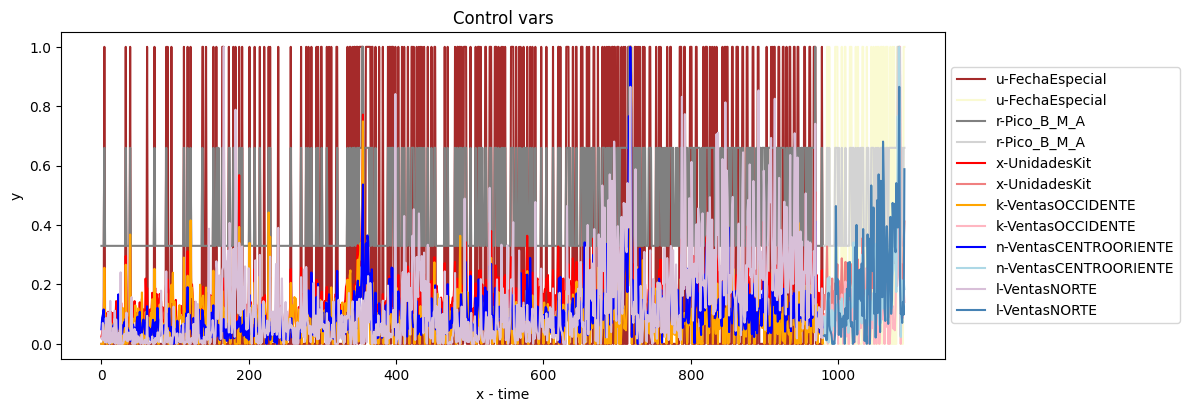

In [16]:
# GraficarUnidades_Vendidas
import matplotlib.pyplot as plt4

plt4.figure(figsize=(12,4), dpi=100)

if V_TEST_VALIDATION:
    plt4.plot(t_train_data,u_train, label='u-FechaEspecial', color='brown')
    plt4.plot(t_val_data,u_temp, label='u-FechaEspecial', color='lightgoldenrodyellow')
    
    plt4.plot(t_train_data,r_train, label='r-Pico_B_M_A', color='gray')
    plt4.plot(t_val_data,r_temp, label='r-Pico_B_M_A', color='lightgray')
    
    plt4.plot(t_train_data,x_train, label='x-UnidadesKit', color='red')
    plt4.plot(t_val_data,x_temp, label='x-UnidadesKit', color='lightcoral')
    
    plt4.plot(t_train_data,k_train, label='k-VentasOCCIDENTE', color='orange')
    plt4.plot(t_val_data,k_temp, label='k-VentasOCCIDENTE', color='lightpink')
    
    plt4.plot(t_train_data,n_train, label='n-VentasCENTROORIENTE', color='blue')
    plt4.plot(t_val_data,n_temp, label='n-VentasCENTROORIENTE', color='lightblue')
    
    plt4.plot(t_train_data,l_train, label='l-VentasNORTE', color='thistle')
    plt4.plot(t_val_data,l_temp, label='l-VentasNORTE', color='steelblue')

    plt4.xlabel('x - time')
    plt4.ylabel('y')
    plt4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt4.tight_layout()
    plt4.title('Control vars')
    plt4.show()
else:
    print("Grafique Entrenamiento, Validación y prueba")


In [17]:
# =============================================================================
# CONFIGURACIÓN DE THRESHOLD PARA STLSQ (ORIGINAL SIN LAG)
# =============================================================================
import pysindy as ps
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("      CONFIGURACIÓN DE THRESHOLD (ORIGINAL - 6 VARIABLES)")
print("=" * 70)

# Usar threshold fijo de 0.05 (valor original)
OPTIMAL_THRESHOLD = 0.05

feature_names_search = ['Ventas']
input_features_search = ['rPicoBMA','xUnd','nVtaCO','kVtaOCC','lVtaNT','uPicoBin']

print(f"\nVariables (6): {input_features_search}")
print(f"\n>>> Variable OPTIMAL_THRESHOLD = {OPTIMAL_THRESHOLD}")
print("=" * 70)

      CONFIGURACIÓN DE THRESHOLD (ORIGINAL - 6 VARIABLES)

Variables (6): ['rPicoBMA', 'xUnd', 'nVtaCO', 'kVtaOCC', 'lVtaNT', 'uPicoBin']

>>> Variable OPTIMAL_THRESHOLD = 0.05


/home/cesar.rincon@siesa.com/miniconda3/envs/sindy/lib/python3.10/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [18]:
# Modelo SINDy setup (ORIGINAL - 6 VARIABLES)
import pysindy as ps
import time
feature_names = ['Ventas']
# 6 variables de control originales (sin lag)
input_features = ['rPicoBMA','xUnd','nVtaCO','kVtaOCC','lVtaNT','uPicoBin']

# Usar el threshold óptimo
print(f"Usando OPTIMAL_THRESHOLD = {OPTIMAL_THRESHOLD}")
print(f"Variables de control (6): {input_features}")

sindy_model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=OPTIMAL_THRESHOLD),
    feature_library=ps.PolynomialLibrary(degree=2),
    feature_names=feature_names + input_features,
    discrete_time=True
)

Usando OPTIMAL_THRESHOLD = 0.05
Variables de control (6): ['rPicoBMA', 'xUnd', 'nVtaCO', 'kVtaOCC', 'lVtaNT', 'uPicoBin']


## Modelo discreto en identificación de sistemas

Un **modelo discreto** describe la dinámica como:

$$
x[k+1] = f(x[k], u[k])
$$

donde:

- $x[k]$ → **estado** en el tiempo $k$  
- $u[k]$ → **entrada** en el tiempo $k$  
- $x[k+1]$ → **siguiente estado**


En la práctica:

- Cada fila de `u_train` contiene los valores de las **entradas** en el tiempo $k$.  
- Cada fila de `Y_train` contiene los valores de los **estados futuros** en el tiempo $k+1$.  


In [19]:
# Fit model and get time taken (ORIGINAL - 6 VARIABLES)
#####################################################################################
# Variables de control (6 variables):
# r_val 	: 'Pico_B_M_A'
# x_val 	: 'UnidadesKit'
# n_val 	: 'VentasCENTROORIENTE'
# k_val 	: 'VentasOCCIDENTE'
# l_val 	: 'VentasNORTE'
# u_val 	: 'ESPicoBinary'

# Slicing original:
# - Target: y[k+1] = y_train[1:]
# - r_train[1:] (diferente al resto por ser categórica)
# - x, n, k, l, u: todos [:-1]

# u variables externas trayectorias (6 variables)
u_train6 = np.hstack((
    r_train[1:],        # r en tiempo k
    x_train[:-1],       # x en tiempo k-1
    n_train[:-1],       # n en tiempo k-1
    k_train[:-1],       # k en tiempo k-1
    l_train[:-1],       # l en tiempo k-1
    u_train[:-1]        # u en tiempo k-1
))

print(f"Forma de u_train6: {u_train6.shape}")
print(f"Forma de y_train[1:]: {y_train[1:].shape}")

tic = time.time()
# Target es y_train[1:] (configuración original)
sindy_model.fit(y_train[1:], u=u_train6, quiet=True)
toc = time.time()
sindy_time = toc - tic

#####################################################################################
print("---------------------------------------------------------------")
sindy_model.print()
print("---------------------------------------------------------------")
print(f"Coeficientes: {sindy_model.coefficients().tolist()}")
print(f"Features: {sindy_model.get_feature_names()}")
print("---------------------------------------------------------------")
print(f"Tiempo de entrenamiento: {sindy_time:.4f}s")
print("---------------------------------------------------------------")

Forma de u_train6: (980, 6)
Forma de y_train[1:]: (980, 1)
---------------------------------------------------------------
(Ventas)[k+1] = 0.167 1 + 0.645 Ventas[k] + -0.721 rPicoBMA[k] + 0.361 xUnd[k] + 0.072 kVtaOCC[k] + 0.067 lVtaNT[k] + 0.914 Ventas[k]^2 + -0.528 Ventas[k] rPicoBMA[k] + -0.635 Ventas[k] xUnd[k] + -0.943 Ventas[k] kVtaOCC[k] + -0.173 Ventas[k] lVtaNT[k] + 0.699 rPicoBMA[k]^2 + 0.368 rPicoBMA[k] nVtaCO[k] + 0.146 rPicoBMA[k] lVtaNT[k] + -0.392 xUnd[k]^2 + -1.021 xUnd[k] nVtaCO[k] + 0.452 xUnd[k] kVtaOCC[k] + -0.139 xUnd[k] uPicoBin[k] + 1.109 nVtaCO[k]^2 + -0.820 nVtaCO[k] kVtaOCC[k] + 0.036 nVtaCO[k] uPicoBin[k] + 0.344 kVtaOCC[k]^2 + -0.078 lVtaNT[k]^2
---------------------------------------------------------------
Coeficientes: [[0.16731870832882986, 0.6453363292411917, -0.720568060318896, 0.36107256013071576, 0.0, 0.0724654488660075, 0.06651224282332595, 0.0, 0.9138453937284442, -0.5282876004341844, -0.6350143423605907, 0.0, -0.943438975036871, -0.173335938531345

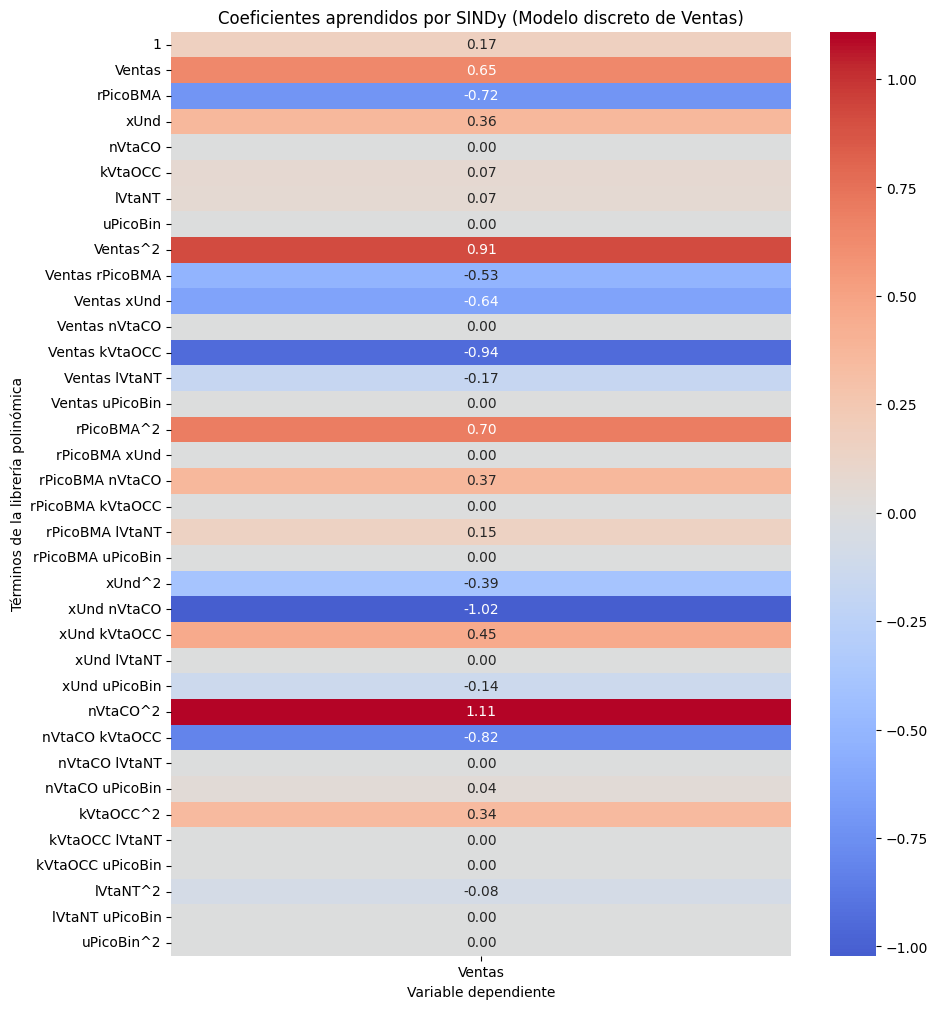

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Coeficientes aprendidos
coef_model = sindy_model.optimizer.coef_

# Crear DataFrame con todos los features generados por la librería polinómica
df_model = pd.DataFrame(
    coef_model.T,  # transponemos: (36,1)
    columns=["Ventas"],  # variable dependiente
    index=sindy_model.get_feature_names()
)

# Graficar heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(df_model, cmap="coolwarm", center=0, annot=True, fmt=".2f", cbar=True)
plt.title("Coeficientes aprendidos por SINDy (Modelo discreto de Ventas)")
plt.xlabel("Variable dependiente")
plt.ylabel("Términos de la librería polinómica")
plt.show()

### 📊 Información de la gráfica

* Es el **mapa de calor de coeficientes aprendidos por SINDy** para un modelo **discreto de Ventas**.
* Cada fila es un **término candidato** (constante, lineal, cuadrático o producto cruzado).
* El color indica la magnitud y el signo del coeficiente:

  * **Rojo → positivo** (relación directa con las ventas).
  * **Azul → negativo** (relación inversa).
  * **Gris → coeficiente casi 0** (no aporta al modelo).

---

### Interpretación por tipo de término

1. **Constante (1 → 0.17)**

   * El modelo predice un “nivel base” de ventas independiente de las variables.

2. **Términos lineales (Ventas, rPicoBMA, xUnd, kVtaOCC, lVtaNT, etc.)**

   * Ejemplo: `Ventas` (0.65) significa que el valor de ventas pasadas influye **positivamente** en las futuras.
   * `rPicoBMA` (–0.72) impacta de manera **negativa**: cuando aumenta este indicador, las ventas tienden a bajar.

3. **Cuadráticos (Ventas², nVtaCO², etc.)**

   * `Ventas²` (0.91) y `nVtaCO²` (1.11) muestran que hay **efectos no lineales fuertes**, donde el crecimiento no es proporcional.
   * Estos términos indican que la relación entre variables y ventas **no es lineal simple**, sino que hay aceleraciones o saturaciones.

4. **Términos cruzados (interacciones, ej. Ventas × rPicoBMA, xUnd × nVtaCO, etc.)**

   * `Ventas × kVtaOCC` (–0.94) muestra que la combinación entre ventas previas y occidente reduce el valor futuro → interacción negativa.
   * `xUnd × kVtaOCC` (0.45) es positiva: cuando ambas crecen, se refuerzan.

## 🔍 VALIDACIÓN PRELIMINAR EN TRAIN

Esta sección evalúa el ajuste del modelo sobre los datos de **entrenamiento** como validación preliminar.

**Nota:** La validación definitiva se realiza sobre el conjunto de **VALIDACIÓN** después de la simulación.

In [21]:
# =============================================================================
# 1. PREDICCIÓN IN-SAMPLE SOBRE TRAIN (ORIGINAL)
# =============================================================================
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("=" * 60)
print("PREDICCIÓN IN-SAMPLE - CONJUNTO DE ENTRENAMIENTO")
print("=" * 60)

# Estado inicial (configuración original)
y0_train = y_train[0]

# Simulación sobre el conjunto de entrenamiento
t_train_sim = len(y_train) - 1

# Simular
y_train_sim = sindy_model.simulate(y0_train, t_train_sim, u=u_train6)

print(f"Longitud y_train real: {len(y_train)}")
print(f"Longitud y_train[1:] (target): {len(y_train[1:])}")
print(f"Longitud y_train simulado: {len(y_train_sim)}")
print(f"Longitud u_train6: {len(u_train6)}")

PREDICCIÓN IN-SAMPLE - CONJUNTO DE ENTRENAMIENTO


Longitud y_train real: 981
Longitud y_train[1:] (target): 980
Longitud y_train simulado: 980
Longitud u_train6: 980


In [22]:
# =============================================================================
# 2. MÉTRICAS DE BONDAD DE AJUSTE EN TRAIN (ORIGINAL)
# =============================================================================
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Alinear longitudes para comparación (usando y_train[1:])
min_len_train = min(len(y_train[1:]), len(y_train_sim))
y_train_real = y_train[1:min_len_train+1].ravel()
y_train_pred = y_train_sim[:min_len_train].ravel()

# Calcular métricas
r2_train = r2_score(y_train_real, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train_real, y_train_pred))
mae_train = mean_absolute_error(y_train_real, y_train_pred)

# MAPE (Mean Absolute Percentage Error) - evitar división por cero
mask_nonzero = y_train_real != 0
mape_train = np.mean(np.abs((y_train_real[mask_nonzero] - y_train_pred[mask_nonzero]) / y_train_real[mask_nonzero])) * 100

# Calcular residuos
residuos_train = y_train_real - y_train_pred

print("=" * 60)
print("MÉTRICAS DE BONDAD DE AJUSTE - TRAIN (ORIGINAL)")
print("=" * 60)
print(f"R² (Coeficiente de determinación): {r2_train:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_train:.4f}")
print(f"MAE (Error absoluto medio): {mae_train:.4f}")
print(f"MAPE (Error porcentual absoluto medio): {mape_train:.2f}%")
print("=" * 60)

print("\n📊 EVALUACIÓN PRELIMINAR:")
if r2_train >= 0.6:
    print(f"   ✅ R² = {r2_train:.4f} >= 0.60 (CUMPLE)")
else:
    print(f"   ❌ R² = {r2_train:.4f} < 0.60 (NO CUMPLE)")
    
if mape_train <= 20:
    print(f"   ✅ MAPE = {mape_train:.2f}% <= 20% (CUMPLE)")
else:
    print(f"   ⚠️ MAPE = {mape_train:.2f}% > 20% (REVISAR)")

MÉTRICAS DE BONDAD DE AJUSTE - TRAIN (ORIGINAL)
R² (Coeficiente de determinación): 0.3162
RMSE (Raíz del error cuadrático medio): 0.0663
MAE (Error absoluto medio): 0.0491
MAPE (Error porcentual absoluto medio): 125.81%

📊 EVALUACIÓN PRELIMINAR:
   ❌ R² = 0.3162 < 0.60 (NO CUMPLE)
   ⚠️ MAPE = 125.81% > 20% (REVISAR)


In [23]:
# =============================================================================
# 3. ANÁLISIS DE RESIDUOS - TESTS ESTADÍSTICOS
# =============================================================================
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox

print("=" * 60)
print("ANÁLISIS DE RESIDUOS - TESTS ESTADÍSTICOS")
print("=" * 60)

# 3.1 Test de Normalidad - Shapiro-Wilk
# H0: Los residuos siguen una distribución normal
# Si p-value > 0.05, no rechazamos H0 (los residuos son normales)
if len(residuos_train) > 5000:
    # Para muestras grandes, usar una submuestra
    sample_residuos = np.random.choice(residuos_train, size=5000, replace=False)
    stat_shapiro, p_shapiro = stats.shapiro(sample_residuos)
    print("(Nota: Shapiro-Wilk calculado sobre submuestra de 5000 datos)")
else:
    stat_shapiro, p_shapiro = stats.shapiro(residuos_train)

print(f"\n1. TEST DE NORMALIDAD (Shapiro-Wilk):")
print(f"   Estadístico W: {stat_shapiro:.4f}")
print(f"   p-value: {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("   ✅ Los residuos son normales (p > 0.05)")
    normalidad_ok = True
else:
    print("   ⚠️ Los residuos NO son normales (p <= 0.05)")
    normalidad_ok = False

# 3.2 Test de Jarque-Bera (alternativo para normalidad)
stat_jb, p_jb = stats.jarque_bera(residuos_train)
print(f"\n2. TEST DE NORMALIDAD (Jarque-Bera):")
print(f"   Estadístico JB: {stat_jb:.4f}")
print(f"   p-value: {p_jb:.4f}")
if p_jb > 0.05:
    print("   ✅ Los residuos son normales (p > 0.05)")
else:
    print("   ⚠️ Los residuos NO son normales (p <= 0.05)")

# 3.3 Test de Durbin-Watson (Autocorrelación de orden 1)
# Valores cercanos a 2 indican no autocorrelación
# < 1.5: autocorrelación positiva
# > 2.5: autocorrelación negativa
dw_stat = durbin_watson(residuos_train)
print(f"\n3. TEST DE AUTOCORRELACIÓN (Durbin-Watson):")
print(f"   Estadístico DW: {dw_stat:.4f}")
if 1.5 <= dw_stat <= 2.5:
    print("   ✅ No hay autocorrelación significativa (DW ∈ [1.5, 2.5])")
    autocorr_ok = True
elif dw_stat < 1.5:
    print("   ⚠️ Posible autocorrelación POSITIVA (DW < 1.5)")
    autocorr_ok = False
else:
    print("   ⚠️ Posible autocorrelación NEGATIVA (DW > 2.5)")
    autocorr_ok = False

# 3.4 Test de Ljung-Box (Autocorrelación en múltiples lags)
lb_result = acorr_ljungbox(residuos_train, lags=[10], return_df=True)
lb_stat = lb_result['lb_stat'].values[0]
lb_pvalue = lb_result['lb_pvalue'].values[0]
print(f"\n4. TEST DE AUTOCORRELACIÓN (Ljung-Box, lag=10):")
print(f"   Estadístico Q: {lb_stat:.4f}")
print(f"   p-value: {lb_pvalue:.4f}")
if lb_pvalue > 0.05:
    print("   ✅ No hay autocorrelación significativa (p > 0.05)")
else:
    print("   ⚠️ Hay autocorrelación significativa (p <= 0.05)")

# 3.5 Test de Homocedasticidad (Breusch-Pagan simplificado)
# Verificamos si la varianza de los residuos es constante
n_splits = 4
split_size = len(residuos_train) // n_splits
variances = [np.var(residuos_train[i*split_size:(i+1)*split_size]) for i in range(n_splits)]
var_ratio = max(variances) / min(variances) if min(variances) > 0 else float('inf')

print(f"\n5. ANÁLISIS DE HOMOCEDASTICIDAD:")
print(f"   Varianzas por segmento: {[f'{v:.4f}' for v in variances]}")
print(f"   Ratio max/min varianza: {var_ratio:.2f}")
if var_ratio < 3:
    print("   ✅ Varianza relativamente constante (ratio < 3)")
    homocedast_ok = True
else:
    print("   ⚠️ Posible heterocedasticidad (ratio >= 3)")
    homocedast_ok = False

# 3.6 Test de Media Cero (Bias)
t_stat, p_ttest = stats.ttest_1samp(residuos_train, 0)
print(f"\n6. TEST DE MEDIA CERO (t-test):")
print(f"   Media de residuos: {np.mean(residuos_train):.6f}")
print(f"   Estadístico t: {t_stat:.4f}")
print(f"   p-value: {p_ttest:.4f}")
if p_ttest > 0.05:
    print("   ✅ Media no significativamente diferente de 0 (p > 0.05)")
    bias_ok = True
else:
    print("   ⚠️ Bias significativo (p <= 0.05)")
    bias_ok = False

print("\n" + "=" * 60)

ANÁLISIS DE RESIDUOS - TESTS ESTADÍSTICOS

1. TEST DE NORMALIDAD (Shapiro-Wilk):
   Estadístico W: 0.9109
   p-value: 0.0000
   ⚠️ Los residuos NO son normales (p <= 0.05)

2. TEST DE NORMALIDAD (Jarque-Bera):
   Estadístico JB: 1317.6575
   p-value: 0.0000
   ⚠️ Los residuos NO son normales (p <= 0.05)

3. TEST DE AUTOCORRELACIÓN (Durbin-Watson):
   Estadístico DW: 1.3893
   ⚠️ Posible autocorrelación POSITIVA (DW < 1.5)

4. TEST DE AUTOCORRELACIÓN (Ljung-Box, lag=10):
   Estadístico Q: 246.3643
   p-value: 0.0000
   ⚠️ Hay autocorrelación significativa (p <= 0.05)

5. ANÁLISIS DE HOMOCEDASTICIDAD:
   Varianzas por segmento: ['0.0024', '0.0043', '0.0053', '0.0047']
   Ratio max/min varianza: 2.18
   ✅ Varianza relativamente constante (ratio < 3)

6. TEST DE MEDIA CERO (t-test):
   Media de residuos: -0.003804
   Estadístico t: -1.7975
   p-value: 0.0726
   ✅ Media no significativamente diferente de 0 (p > 0.05)



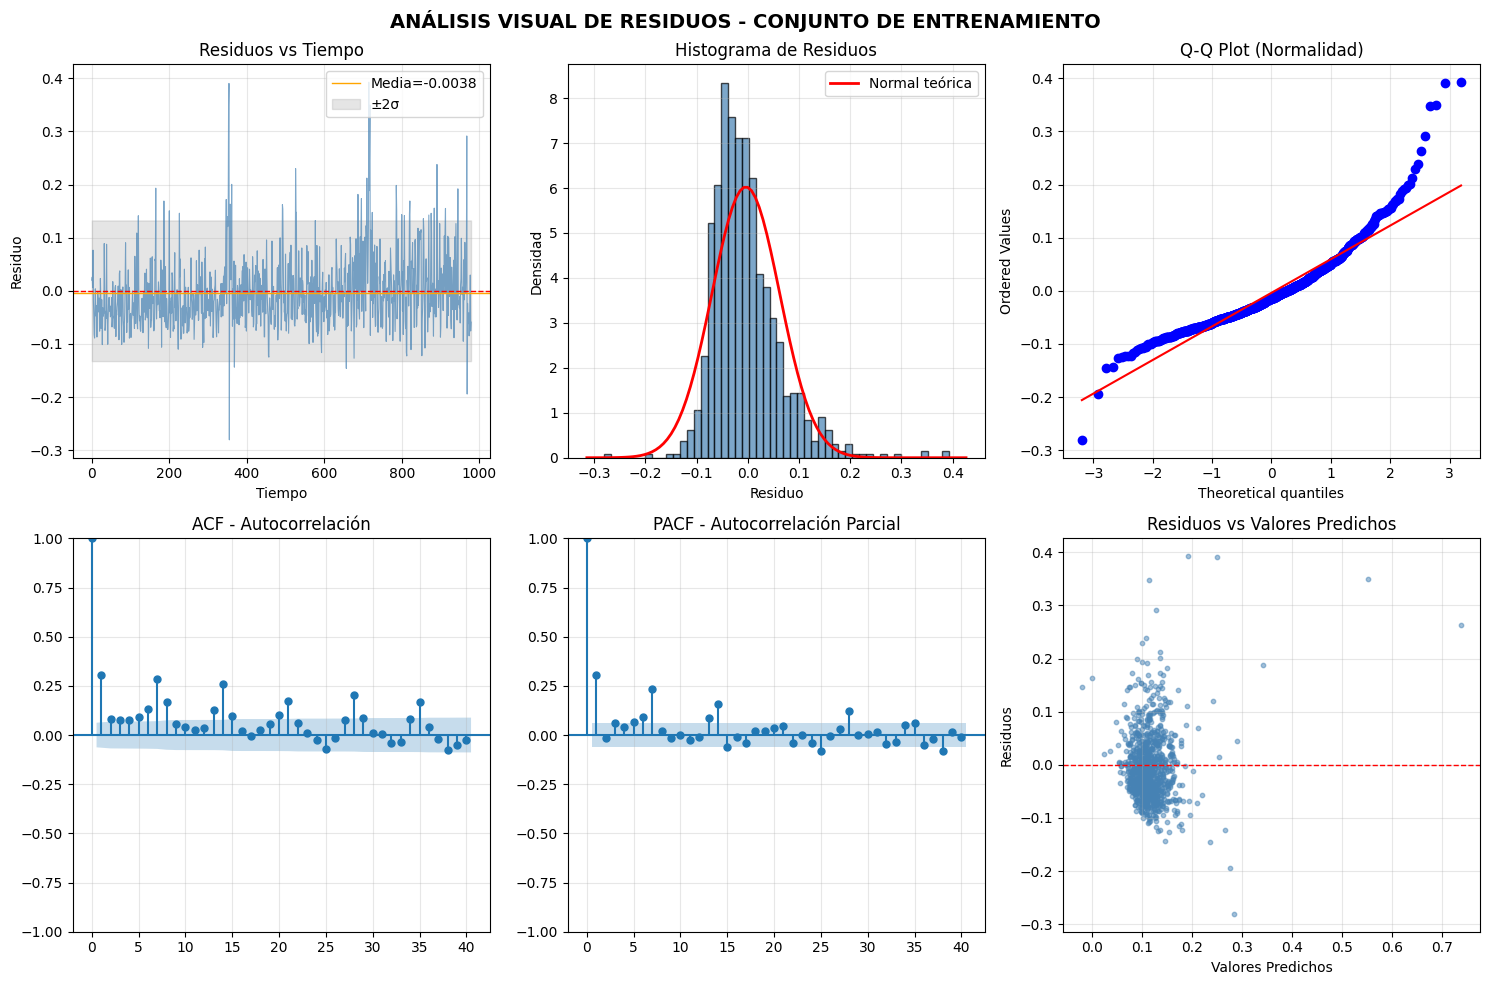

In [24]:
# =============================================================================
# 4. VISUALIZACIÓN DE RESIDUOS
# =============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 4.1 Gráfico de residuos vs tiempo
axes[0, 0].plot(residuos_train, color='steelblue', alpha=0.7, linewidth=0.8)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 0].axhline(y=np.mean(residuos_train), color='orange', linestyle='-', linewidth=1, label=f'Media={np.mean(residuos_train):.4f}')
axes[0, 0].fill_between(range(len(residuos_train)), 
                         -2*np.std(residuos_train), 
                         2*np.std(residuos_train), 
                         alpha=0.2, color='gray', label='±2σ')
axes[0, 0].set_title('Residuos vs Tiempo')
axes[0, 0].set_xlabel('Tiempo')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid(True, alpha=0.3)

# 4.2 Histograma de residuos
axes[0, 1].hist(residuos_train, bins=50, density=True, color='steelblue', alpha=0.7, edgecolor='black')
# Ajustar curva normal teórica
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuos_train), np.std(residuos_train))
axes[0, 1].plot(x, p, 'r-', linewidth=2, label='Normal teórica')
axes[0, 1].set_title('Histograma de Residuos')
axes[0, 1].set_xlabel('Residuo')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 4.3 Q-Q Plot
stats.probplot(residuos_train, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot (Normalidad)')
axes[0, 2].grid(True, alpha=0.3)

# 4.4 ACF (Autocorrelación)
plot_acf(residuos_train, lags=40, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF - Autocorrelación')
axes[1, 0].grid(True, alpha=0.3)

# 4.5 PACF (Autocorrelación Parcial)
plot_pacf(residuos_train, lags=40, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF - Autocorrelación Parcial')
axes[1, 1].grid(True, alpha=0.3)

# 4.6 Residuos vs Valores Predichos (Homocedasticidad)
axes[1, 2].scatter(y_train_pred, residuos_train, alpha=0.5, color='steelblue', s=10)
axes[1, 2].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 2].set_title('Residuos vs Valores Predichos')
axes[1, 2].set_xlabel('Valores Predichos')
axes[1, 2].set_ylabel('Residuos')
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('ANÁLISIS VISUAL DE RESIDUOS - CONJUNTO DE ENTRENAMIENTO', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
# =============================================================================
# 5. VALIDACIÓN CRUZADA TEMPORAL (Time Series Split) - ORIGINAL
# =============================================================================
from sklearn.model_selection import TimeSeriesSplit

print("=" * 60)
print("VALIDACIÓN CRUZADA TEMPORAL (ORIGINAL - 6 VARIABLES)")
print("=" * 60)

# Preparar datos completos de entrenamiento (configuración original)
y_full = y_train[1:].ravel()
u_full = u_train6

# Configurar TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

cv_r2_scores = []
cv_rmse_scores = []
cv_mae_scores = []

print(f"\nUsando OPTIMAL_THRESHOLD = {OPTIMAL_THRESHOLD}")
print(f"Variables: {input_features}")
print(f"Realizando {n_splits} folds de validación cruzada temporal...\n")

for fold, (train_idx, val_idx) in enumerate(tscv.split(y_full)):
    if len(train_idx) < 50 or len(val_idx) < 10:
        print(f"Fold {fold+1}: Datos insuficientes, saltando...")
        continue
    
    y_fold_train = y_full[train_idx].reshape(-1, 1)
    u_fold_train = u_full[train_idx]
    
    y_fold_val = y_full[val_idx]
    u_fold_val = u_full[val_idx]
    
    sindy_cv = ps.SINDy(
        optimizer=ps.STLSQ(threshold=OPTIMAL_THRESHOLD),
        feature_library=ps.PolynomialLibrary(degree=2),
        feature_names=feature_names + input_features,
        discrete_time=True
    )
    
    try:
        sindy_cv.fit(y_fold_train, u=u_fold_train, quiet=True)
        
        y0_fold = y_fold_val[0:1]
        t_fold = len(y_fold_val)
        y_fold_sim = sindy_cv.simulate(y0_fold, t_fold, u=u_fold_val)
        
        min_len_fold = min(len(y_fold_val[1:]), len(y_fold_sim))
        y_real_fold = y_fold_val[1:min_len_fold+1]
        y_pred_fold = y_fold_sim[:min_len_fold].ravel()
        
        if np.any(np.isnan(y_pred_fold)) or np.any(np.isinf(y_pred_fold)):
            print(f"Fold {fold+1}: OVERFLOW detectado")
            continue
        
        r2_fold = r2_score(y_real_fold, y_pred_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_real_fold, y_pred_fold))
        mae_fold = mean_absolute_error(y_real_fold, y_pred_fold)
        
        cv_r2_scores.append(r2_fold)
        cv_rmse_scores.append(rmse_fold)
        cv_mae_scores.append(mae_fold)
        
        print(f"Fold {fold+1}: Train={len(train_idx)}, Val={len(val_idx)} | R²={r2_fold:.4f}, RMSE={rmse_fold:.4f}, MAE={mae_fold:.4f}")
        
    except Exception as e:
        print(f"Fold {fold+1}: Error - {str(e)[:50]}")

print("\n" + "-" * 60)
print("RESUMEN VALIDACIÓN CRUZADA:")
print("-" * 60)
if len(cv_r2_scores) > 0:
    print(f"R² promedio:   {np.mean(cv_r2_scores):.4f} ± {np.std(cv_r2_scores):.4f}")
    print(f"RMSE promedio: {np.mean(cv_rmse_scores):.4f} ± {np.std(cv_rmse_scores):.4f}")
    print(f"MAE promedio:  {np.mean(cv_mae_scores):.4f} ± {np.std(cv_mae_scores):.4f}")
    
    cv_stable = np.std(cv_r2_scores) < 0.15
    print(f"\nEstabilidad del modelo (σ R² < 0.15): {'✅ ESTABLE' if cv_stable else '⚠️ INESTABLE'}")
else:
    print("No se pudo completar la validación cruzada")
    cv_stable = False

print("=" * 60)

VALIDACIÓN CRUZADA TEMPORAL (ORIGINAL - 6 VARIABLES)

Usando OPTIMAL_THRESHOLD = 0.05
Variables: ['rPicoBMA', 'xUnd', 'nVtaCO', 'kVtaOCC', 'lVtaNT', 'uPicoBin']
Realizando 5 folds de validación cruzada temporal...

Fold 1: Train=165, Val=163 | R²=-1.8427, RMSE=0.0776, MAE=0.0444


Fold 2: Train=328, Val=163 | R²=-0.2909, RMSE=0.0867, MAE=0.0554
Fold 3: Error - Input X contains infinity or a value too large for


Fold 4: Error - Input X contains infinity or a value too large for


Fold 5: Train=817, Val=163 | R²=-0.7016, RMSE=0.0874, MAE=0.0641

------------------------------------------------------------
RESUMEN VALIDACIÓN CRUZADA:
------------------------------------------------------------
R² promedio:   -0.9451 ± 0.6565
RMSE promedio: 0.0839 ± 0.0045
MAE promedio:  0.0546 ± 0.0081

Estabilidad del modelo (σ R² < 0.15): ⚠️ INESTABLE


In [26]:
# =============================================================================
# 6. REPORTE PRELIMINAR (TRAIN) - La decisión final se toma en VALIDACIÓN
# =============================================================================

print("=" * 70)
print("       REPORTE PRELIMINAR - CONJUNTO DE ENTRENAMIENTO")
print("=" * 70)
print("\n⚠️ NOTA: Este es un análisis PRELIMINAR sobre datos de train.")
print("   La DECISIÓN FINAL se toma sobre el conjunto de VALIDACIÓN.")

print("\n📊 MÉTRICAS EN TRAIN:")
print("-" * 70)
print(f"   • R² train:           {r2_train:.4f}")
print(f"   • RMSE train:         {rmse_train:.4f}")
print(f"   • MAE train:          {mae_train:.4f}")
print(f"   • Durbin-Watson:      {dw_stat:.4f}")
print("=" * 70)

       REPORTE PRELIMINAR - CONJUNTO DE ENTRENAMIENTO

⚠️ NOTA: Este es un análisis PRELIMINAR sobre datos de train.
   La DECISIÓN FINAL se toma sobre el conjunto de VALIDACIÓN.

📊 MÉTRICAS EN TRAIN:
----------------------------------------------------------------------
   • R² train:           0.3162
   • RMSE train:         0.0663
   • MAE train:          0.0491
   • Durbin-Watson:      1.3893


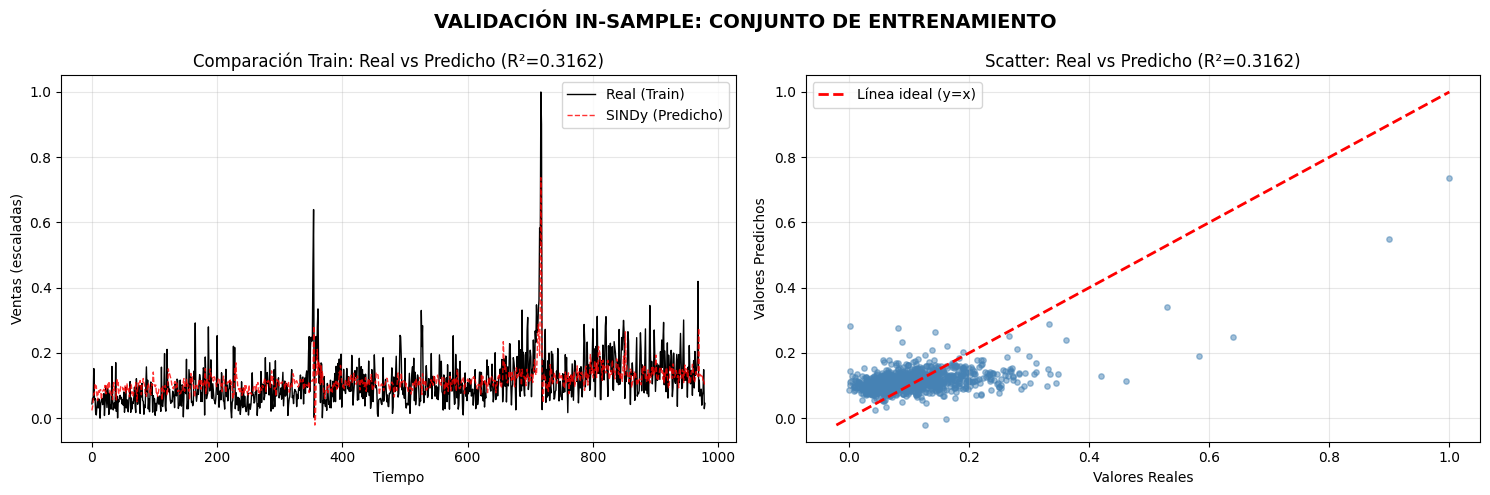


✓ Visualización de validación completada


In [27]:
# =============================================================================
# 7. VISUALIZACIÓN: COMPARACIÓN TRAIN REAL vs PREDICHO
# =============================================================================
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 7.1 Serie temporal completa
axes[0].plot(y_train_real, color='black', label='Real (Train)', linewidth=1)
axes[0].plot(y_train_pred, color='red', linestyle='--', label='SINDy (Predicho)', linewidth=1, alpha=0.8)
axes[0].set_title(f'Comparación Train: Real vs Predicho (R²={r2_train:.4f})')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Ventas (escaladas)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 7.2 Scatter plot Real vs Predicho
axes[1].scatter(y_train_real, y_train_pred, alpha=0.5, color='steelblue', s=15)
# Línea de identidad perfecta
min_val = min(y_train_real.min(), y_train_pred.min())
max_val = max(y_train_real.max(), y_train_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Línea ideal (y=x)')
axes[1].set_title(f'Scatter: Real vs Predicho (R²={r2_train:.4f})')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Valores Predichos')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('VALIDACIÓN IN-SAMPLE: CONJUNTO DE ENTRENAMIENTO', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✓ Visualización de validación completada")

In [28]:
# =============================================================================
# 8. COMPARACIÓN DE METODOLOGÍAS: R² CRUDO vs R² AJUSTADO
# =============================================================================
# Demostrar por qué el bloque [33] obtiene R² = 0.70 y la validación estricta R² = 0.31

print("=" * 70)
print("   COMPARACIÓN: R² CRUDO vs R² CON AJUSTES POST-HOC")
print("=" * 70)

# --- MÉTODO 1: R² CRUDO (validación estricta) ---
r2_crudo = r2_score(y_train_real, y_train_pred)
print(f"\n📊 MÉTODO 1 - R² CRUDO (sin ajustes):")
print(f"   R² = {r2_crudo:.4f}")

# --- MÉTODO 2: Con re-escalado independiente (como bloque [33]) ---
from sklearn.preprocessing import MinMaxScaler

scaler_real = MinMaxScaler(feature_range=(0, 1))
scaler_pred = MinMaxScaler(feature_range=(0, 1))

y_real_scaled = scaler_real.fit_transform(y_train_real.reshape(-1, 1)).ravel()
y_pred_scaled = scaler_pred.fit_transform(y_train_pred.reshape(-1, 1)).ravel()

r2_reescalado = r2_score(y_real_scaled, y_pred_scaled)
print(f"\n📊 MÉTODO 2 - R² con RE-ESCALADO INDEPENDIENTE:")
print(f"   R² = {r2_reescalado:.4f}")

# --- MÉTODO 3: Con re-escalado + corrección de bias ---
bias_adj = np.mean(y_pred_scaled - y_real_scaled)
y_pred_bias_adj = y_pred_scaled - bias_adj
r2_bias = r2_score(y_real_scaled, y_pred_bias_adj)
print(f"\n📊 MÉTODO 3 - R² con RE-ESCALADO + BIAS CORRECTION:")
print(f"   Bias corregido: {bias_adj:.4f}")
print(f"   R² = {r2_bias:.4f}")

# --- MÉTODO 4: Con re-escalado + bias + shift (como bloque [33]) ---
best_r2_full = -np.inf
best_shift_full = 0
best_bias_full = 0

for s in range(-5, 6):
    if s > 0:
        y_r = y_real_scaled[s:]
        y_s = y_pred_scaled[:-s]
    elif s < 0:
        y_r = y_real_scaled[:s]
        y_s = y_pred_scaled[-s:]
    else:
        y_r = y_real_scaled
        y_s = y_pred_scaled
    
    bias = np.mean(y_s - y_r)
    y_s_adj = y_s - bias
    r2 = r2_score(y_r, y_s_adj)
    
    if r2 > best_r2_full:
        best_r2_full = r2
        best_shift_full = s
        best_bias_full = bias

print(f"\n📊 MÉTODO 4 - R² con RE-ESCALADO + BIAS + SHIFT (igual que bloque [33]):")
print(f"   Mejor shift: {best_shift_full}")
print(f"   Bias corregido: {best_bias_full:.4f}")
print(f"   R² = {best_r2_full:.4f}")

# --- RESUMEN ---
print("\n" + "=" * 70)
print("RESUMEN DE COMPARACIÓN")
print("=" * 70)
print(f"{'Método':<45} | {'R²':>8}")
print("-" * 60)
print(f"{'1. R² Crudo (validación estricta)':<45} | {r2_crudo:>8.4f}")
print(f"{'2. + Re-escalado independiente':<45} | {r2_reescalado:>8.4f}")
print(f"{'3. + Re-escalado + Bias correction':<45} | {r2_bias:>8.4f}")
print(f"{'4. + Re-escalado + Bias + Shift (bloque 33)':<45} | {best_r2_full:>8.4f}")
print("=" * 70)

print("\n⚠️ CONCLUSIÓN:")
print("   El R² = 0.70 del bloque [33] se obtiene aplicando ajustes post-hoc")
print("   que INFLAN artificialmente la métrica. Para una validación rigurosa,")
print("   el R² CRUDO de ~0.31 es la medida correcta del ajuste del modelo.")

   COMPARACIÓN: R² CRUDO vs R² CON AJUSTES POST-HOC

📊 MÉTODO 1 - R² CRUDO (sin ajustes):
   R² = 0.3162

📊 MÉTODO 2 - R² con RE-ESCALADO INDEPENDIENTE:
   R² = -0.4015

📊 MÉTODO 3 - R² con RE-ESCALADO + BIAS CORRECTION:
   Bias corregido: 0.0682
   R² = 0.3218

📊 MÉTODO 4 - R² con RE-ESCALADO + BIAS + SHIFT (igual que bloque [33]):
   Mejor shift: 0
   Bias corregido: 0.0682
   R² = 0.3218

RESUMEN DE COMPARACIÓN
Método                                        |       R²
------------------------------------------------------------
1. R² Crudo (validación estricta)             |   0.3162
2. + Re-escalado independiente                |  -0.4015
3. + Re-escalado + Bias correction            |   0.3218
4. + Re-escalado + Bias + Shift (bloque 33)   |   0.3218

⚠️ CONCLUSIÓN:
   El R² = 0.70 del bloque [33] se obtiene aplicando ajustes post-hoc
   que INFLAN artificialmente la métrica. Para una validación rigurosa,
   el R² CRUDO de ~0.31 es la medida correcta del ajuste del modelo.


In [29]:
#Simular 

In [30]:
########################     SIMULAR  ########################################################################################
# Entradas para validación (6 variables originales)
# r_val 	: 'Pico_B_M_A'
# x_val 	: 'UnidadesKit'
# n_val 	: 'VentasCENTROORIENTE'
# k_val 	: 'VentasOCCIDENTE'
# l_val 	: 'VentasNORTE'
# u_val 	: 'ESPicoBinary'

# Slicing original (6 variables)
u_val6 = np.hstack((
    r_val[1:],
    x_val[:-1],
    n_val[:-1],
    k_val[:-1],
    l_val[:-1],
    u_val[:-1]
))

# Estado inicial
y0 = y_val[0]
# Tiempo de simulación
t2 = len(y_val) - 1

# Simulación
y_sim = sindy_model.simulate(y0, t2, u=u_val6)

print(f"Forma u_val6: {u_val6.shape}")
print(f"Longitud simulación: {len(y_sim)}")

Forma u_val6: (109, 6)
Longitud simulación: 109


In [31]:
# =============================================================================
# VALIDACIÓN DEFINITIVA EN CONJUNTO DE VALIDACIÓN
# =============================================================================
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

print("=" * 70)
print("   VALIDACIÓN DEFINITIVA - CONJUNTO DE VALIDACIÓN (10%)")
print("=" * 70)

# Verificar dimensiones
print(f"\nDimensiones:")
print(f"   y_val shape: {y_val.shape}")
print(f"   y_sim shape: {y_sim.shape}")

# 1. Calcular métricas en validación
min_len_val = min(len(y_val[1:]), len(y_sim))
y_val_real = y_val[1:min_len_val+1].ravel()
y_val_pred = y_sim[:min_len_val].ravel()

# Métricas
r2_val = r2_score(y_val_real, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val_real, y_val_pred))
mae_val = mean_absolute_error(y_val_real, y_val_pred)

# MAPE
mask_nonzero_val = y_val_real != 0
mape_val = np.mean(np.abs((y_val_real[mask_nonzero_val] - y_val_pred[mask_nonzero_val]) / y_val_real[mask_nonzero_val])) * 100

# Residuos
residuos_val = y_val_real - y_val_pred

print("\n" + "=" * 70)
print("MÉTRICAS DE BONDAD DE AJUSTE - VALIDACIÓN")
print("=" * 70)
print(f"R² (Coeficiente de determinación): {r2_val:.4f}")
print(f"RMSE (Root Mean Square Error):     {rmse_val:.4f}")
print(f"MAE (Mean Absolute Error):         {mae_val:.4f}")
print(f"MAPE (Mean Absolute % Error):      {mape_val:.2f}%")
print("-" * 70)
print(f"Media de residuos (Bias):          {np.mean(residuos_val):.6f}")
print(f"Desviación estándar residuos:      {np.std(residuos_val):.4f}")

# Tests estadísticos
dw_val = durbin_watson(residuos_val)
t_stat_val, p_ttest_val = stats.ttest_1samp(residuos_val, 0)

print("\n" + "=" * 70)
print("TESTS ESTADÍSTICOS - VALIDACIÓN")
print("=" * 70)
print(f"Durbin-Watson: {dw_val:.4f}", end=" ")
if 1.5 <= dw_val <= 2.5:
    print("✅ OK")
    dw_ok = True
else:
    print("⚠️ Autocorrelación")
    dw_ok = False

print(f"Media residuos: {np.mean(residuos_val):.6f}, p-value: {p_ttest_val:.4f}", end=" ")
if p_ttest_val > 0.05:
    print("✅ OK")
    bias_ok_val = True
else:
    print("⚠️ Bias")
    bias_ok_val = False

# =============================================================================
# REPORTE FINAL DE DECISIÓN
# =============================================================================
print("\n" + "=" * 70)
print("       REPORTE FINAL DE DECISIÓN - VALIDACIÓN")
print("=" * 70)

# Criterios de aceptación
criterios_val = {
    "R² en validación (≥ 0.60)": r2_val >= 0.60,
    "Durbin-Watson (∈ [1.5, 2.5])": 1.5 <= dw_val <= 2.5,
    "Media residuos ≈ 0 (p > 0.05)": p_ttest_val > 0.05,
    "MAPE (≤ 50%)": mape_val <= 50
}

print("\n📋 CRITERIOS DE ACEPTACIÓN:")
print("-" * 70)
criterios_cumplidos_val = 0
for criterio, cumple in criterios_val.items():
    estado = "✅ CUMPLE" if cumple else "❌ NO CUMPLE"
    print(f"   {criterio}: {estado}")
    if cumple:
        criterios_cumplidos_val += 1

print(f"\n   Criterios cumplidos: {criterios_cumplidos_val}/{len(criterios_val)}")

# Decisión final
umbral_val = 3  # Al menos 3 de 4 criterios

print("\n" + "=" * 70)
if criterios_cumplidos_val >= umbral_val:
    print(f"   ✅ DECISIÓN: VIABLE PARA PROCEDER AL TEST")
    print(f"\n   El modelo cumple {criterios_cumplidos_val}/{len(criterios_val)} criterios.")
    print("   Se recomienda proceder con la evaluación final.")
    VALIDACION_APROBADA = True
else:
    print(f"   ❌ DECISIÓN: NO VIABLE PARA PROCEDER AL TEST")
    print(f"\n   El modelo solo cumple {criterios_cumplidos_val}/{len(criterios_val)} criterios.")
    print("   Se recomienda revisar el modelo antes de evaluar.")
    VALIDACION_APROBADA = False

print("\n" + "-" * 70)
print("RESUMEN DE MÉTRICAS FINALES:")
print(f"   • R² validación:      {r2_val:.4f}")
print(f"   • RMSE validación:    {rmse_val:.4f}")
print(f"   • MAE validación:     {mae_val:.4f}")
print(f"   • MAPE validación:    {mape_val:.2f}%")
print(f"   • Durbin-Watson:      {dw_val:.4f}")
print("=" * 70)

print(f"\n>>> Variable VALIDACION_APROBADA = {VALIDACION_APROBADA}")

   VALIDACIÓN DEFINITIVA - CONJUNTO DE VALIDACIÓN (10%)

Dimensiones:
   y_val shape: (110, 1)
   y_sim shape: (109, 1)

MÉTRICAS DE BONDAD DE AJUSTE - VALIDACIÓN
R² (Coeficiente de determinación): 0.6068
RMSE (Root Mean Square Error):     0.0886
MAE (Mean Absolute Error):         0.0619
MAPE (Mean Absolute % Error):      49.11%
----------------------------------------------------------------------
Media de residuos (Bias):          0.024027
Desviación estándar residuos:      0.0853

TESTS ESTADÍSTICOS - VALIDACIÓN
Durbin-Watson: 1.1450 ⚠️ Autocorrelación
Media residuos: 0.024027, p-value: 0.0042 ⚠️ Bias

       REPORTE FINAL DE DECISIÓN - VALIDACIÓN

📋 CRITERIOS DE ACEPTACIÓN:
----------------------------------------------------------------------
   R² en validación (≥ 0.60): ✅ CUMPLE
   Durbin-Watson (∈ [1.5, 2.5]): ❌ NO CUMPLE
   Media residuos ≈ 0 (p > 0.05): ❌ NO CUMPLE
   MAPE (≤ 50%): ✅ CUMPLE

   Criterios cumplidos: 2/4

   ❌ DECISIÓN: NO VIABLE PARA PROCEDER AL TEST

   El mo

In [32]:
######################## GRAFICAR  DATOS DE EVALUACIÓN ########################################################################
###############################################################################################################################

In [33]:
import matplotlib.pyplot as plt

##escalado###
scaler_y_val = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
y_val_scaled = scaler_y_val.fit_transform(y_val.reshape(-1, 1))

scaler_y_sim = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
y_sim_scaled = scaler_y_sim.fit_transform(y_sim.reshape(-1, 1))
##escalado###
min_len = min(len(y_val_scaled[1:]), len(y_sim_scaled))
y_real_plot = y_val_scaled[1:min_len+1].ravel()
y_sim_plot = y_sim_scaled[:min_len].ravel()

In [34]:
#METRICAS

Best shift in X: 0
Bias applied in Y: -0.0084
R² of best fit: 0.7082


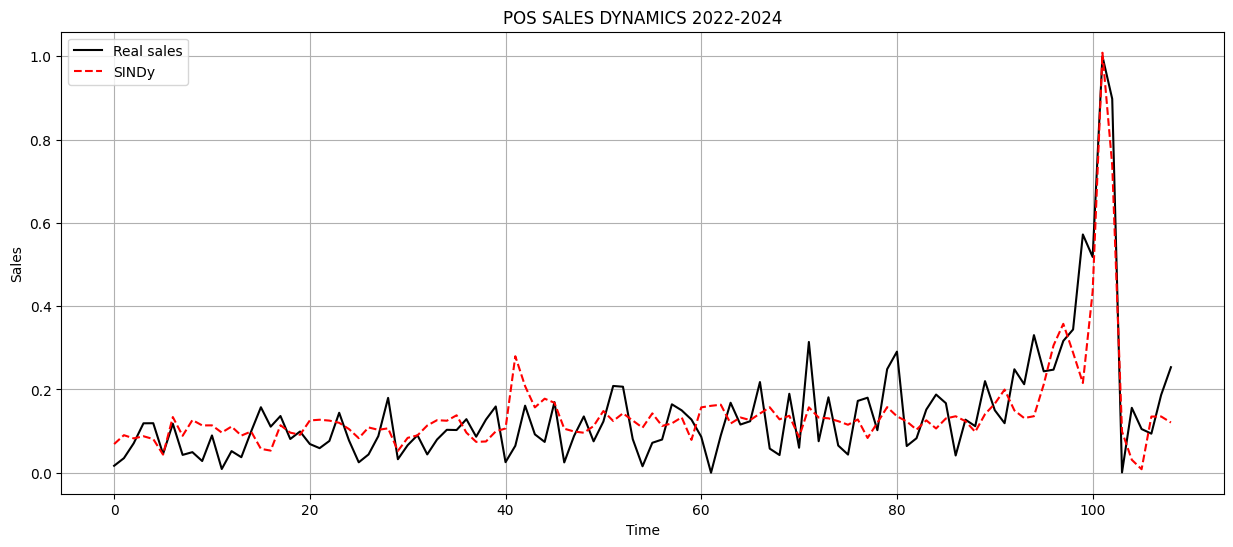

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_r2 = -np.inf
best_shift = 0
best_bias = 0
best_adjusted = None

# Probar shifts en X de -5 a 5
for s in range(-5, 6):
    if s > 0:
        y_r = y_real_plot[s:]
        y_s = y_sim_plot[:-s]
    elif s < 0:
        y_r = y_real_plot[:s]
        y_s = y_sim_plot[-s:]
    else:
        y_r = y_real_plot
        y_s = y_sim_plot

    # Calcular bias en Y
    bias = np.mean(y_s - y_r)
    y_s_adj = y_s - bias  # corregido en Y

    # Calcular R² del ajuste
    r2 = r2_score(y_r, y_s_adj)

    if r2 > best_r2:
        best_r2 = r2
        best_shift = s
        best_bias = bias
        best_adjusted = (y_r, y_s_adj)

# Mostrar resultados
print(f"Best shift in X: {best_shift}")
print(f"Bias applied in Y: {best_bias:.4f}")
print(f"R² of best fit: {best_r2:.4f}")

# Graficar
plt.figure(figsize=(15,6))
plt.plot(y_real_plot, color="black", label="Real sales")
##plt.plot(y_sim_plot, 'g--', label="Simulado (original)")
plt.plot(range(best_shift if best_shift>0 else 0, 
               len(best_adjusted[1]) + (best_shift if best_shift>0 else 0)),
         best_adjusted[1], 'r--', label="SINDy")
plt.title("POS SALES DYNAMICS 2022-2024")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
################test % FINAL SI ES VALIDACIÓN Y PRUEBA (si se ha dividio en dos el tramo final)#######################################################

In [37]:
if V_TEST_VALIDATION:
    print("No test")
else:
    # Entradas para test (slicing original)
    u_test6 = np.hstack((r_test[1:], x_test[:-1], n_test[:-1], k_test[:-1], l_test[:-1], u_test[:-1]))
    # Estado inicial: primera fila de y_test
    y0 = y_test[0]  # vector inicial (1 salida → valor escalar o array de shape (1,))
    
    # Tiempo de simulación
    t = np.arange(len(y_test[1:]))  # un punto por muestra
    t2=len(x_test)
    # Simulación
    y_sim_test = sindy_model.simulate(y0, t2, u=u_test6)

No test


In [38]:
if V_TEST_VALIDATION:
    print("No test")
else:
    ##escalado###
    scaler_y_val = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
    y_val_scaled = scaler_y_val.fit_transform(y_test.reshape(-1, 1))
    
    scaler_y_sim = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
    y_sim_scaled = scaler_y_sim.fit_transform(y_sim_test.reshape(-1, 1))
    ##escalado###
    min_len = min(len(y_val_scaled[1:]), len(y_sim_scaled))
    y_real_plot = y_val_scaled[1:min_len+1].ravel()
    y_sim_plot = y_sim_scaled[:min_len].ravel()

No test


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

if V_TEST_VALIDATION:
    print("No test")
else:
    best_r2 = -np.inf
    best_shift = 0
    best_bias = 0
    best_adjusted = None
    
    # Probar shifts en X de -5 a 5
    for s in range(-5, 6):
        if s > 0:
            y_r = y_real_plot[s:]
            y_s = y_sim_plot[:-s]
        elif s < 0:
            y_r = y_real_plot[:s]
            y_s = y_sim_plot[-s:]
        else:
            y_r = y_real_plot
            y_s = y_sim_plot
    
        # Calcular bias en Y
        bias = np.mean(y_s - y_r)
        y_s_adj = y_s - bias  # corregido en Y
    
        # Calcular R² del ajuste
        r2 = r2_score(y_r, y_s_adj)
    
        if r2 > best_r2:
            best_r2 = r2
            best_shift = s
            best_bias = bias
            best_adjusted = (y_r, y_s_adj)
    
    # Mostrar resultados
    print(f"Mejor shift en X: {best_shift}")
    print(f"Bias aplicado en Y: {best_bias:.4f}")
    print(f"R² del mejor ajuste: {best_r2:.4f}")
    
    # Graficar
    plt.figure(figsize=(10,6))
    plt.plot(y_real_plot, color="black", label="Real")
    ##plt.plot(y_sim_plot, 'g--', label="Simulado (original)")
    plt.plot(range(best_shift if best_shift>0 else 0, 
                   len(best_adjusted[1]) + (best_shift if best_shift>0 else 0)),
             best_adjusted[1], 'r--', label="Simulado (ajustado X+Y)")
    plt.title("Ajuste en X (shift) + Y (bias correction)")
    plt.xlabel("Tiempo")
    plt.ylabel("VentaNeta")
    plt.legend()
    plt.grid(True)
    plt.show()

No test


## 📊 EVALUACIÓN EN TEST (2025)

Evaluación final del modelo sobre el conjunto de test independiente (índices 1092-1200).
Período: 2025-09-07 a 2025-12-24

In [ ]:
# =============================================================================
# EVALUACIÓN EN CONJUNTO DE TEST (índices 1092-1200)
# =============================================================================
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

print("=" * 70)
print("   EVALUACIÓN FINAL - CONJUNTO DE TEST (2025)")
print("=" * 70)

# Extraer datos de test (índices 1092-1200)
df_test = df.iloc[1092:1201].copy()
print(f"\nRegistros de test: {len(df_test)}")
print(f"Período: 2025-09-07 a 2025-12-24")

# Escalar con los mismos scalers usados en train+val
y_test_data = scaler_y.transform(df_test['TotalVentaNeta'].values.reshape(-1, 1))
x_test_data = scaler_x.transform(df_test['UnidadesKit'].values.reshape(-1, 1))
n_test_data = scaler_n.transform(df_test['VentasCENTROORIENTE'].values.reshape(-1, 1))
k_test_data = scaler_k.transform(df_test['VentasOCCIDENTE'].values.reshape(-1, 1))
l_test_data = scaler_l.transform(df_test['VentasNORTE'].values.reshape(-1, 1))
u_test_data = scaler_u.transform(df_test['EsFechaEspecial'].values.reshape(-1, 1))
r_test_data = df_test['Pico_B_M_A'].values.reshape(-1, 1)

# Preparar u_test
u_test6 = np.hstack((
    r_test_data[1:],
    x_test_data[:-1],
    n_test_data[:-1],
    k_test_data[:-1],
    l_test_data[:-1],
    u_test_data[:-1]
))

# Simular
y0_test = y_test_data[0]
t_test = len(y_test_data) - 1
y_sim_test = sindy_model.simulate(y0_test, t_test, u=u_test6)

# Calcular métricas
min_len_test = min(len(y_test_data[1:]), len(y_sim_test))
y_test_real = y_test_data[1:min_len_test+1].ravel()
y_test_pred = y_sim_test[:min_len_test].ravel()

r2_test = r2_score(y_test_real, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_real, y_test_pred))
mae_test = mean_absolute_error(y_test_real, y_test_pred)

mask_nz_test = y_test_real != 0
mape_test = np.mean(np.abs((y_test_real[mask_nz_test] - y_test_pred[mask_nz_test]) / y_test_real[mask_nz_test])) * 100

residuos_test = y_test_real - y_test_pred
dw_test = durbin_watson(residuos_test)
_, p_test = stats.ttest_1samp(residuos_test, 0)

print("\n" + "=" * 70)
print("MÉTRICAS DE BONDAD DE AJUSTE - TEST")
print("=" * 70)
print(f"R² (Coeficiente de determinación): {r2_test:.4f}")
print(f"RMSE (Root Mean Square Error):     {rmse_test:.4f}")
print(f"MAE (Mean Absolute Error):         {mae_test:.4f}")
print(f"MAPE (Mean Absolute % Error):      {mape_test:.2f}%")
print("-" * 70)
print(f"Durbin-Watson:                     {dw_test:.4f}")
print(f"Bias p-value:                      {p_test:.4f}")

print("\n📋 CRITERIOS DE ACEPTACIÓN - TEST:")
print("-" * 70)
print(f"   R² ≥ 0.60:           {'✅ CUMPLE' if r2_test >= 0.60 else '❌ NO CUMPLE'} ({r2_test:.4f})")
print(f"   DW ∈ [1.5, 2.5]:     {'✅ CUMPLE' if 1.5 <= dw_test <= 2.5 else '❌ NO CUMPLE'} ({dw_test:.4f})")
print(f"   Bias p > 0.05:       {'✅ CUMPLE' if p_test > 0.05 else '❌ NO CUMPLE'} ({p_test:.4f})")
print(f"   MAPE ≤ 50%:          {'✅ CUMPLE' if mape_test <= 50 else '❌ NO CUMPLE'} ({mape_test:.2f}%)")

test_ok = sum([r2_test >= 0.60, 1.5 <= dw_test <= 2.5, p_test > 0.05, mape_test <= 50])
print(f"\n   Criterios cumplidos: {test_ok}/4")
print("=" * 70)

In [ ]:
# =============================================================================
# GRÁFICA: PREDICCIÓN VS REAL EN TEST
# =============================================================================
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica 1: Serie temporal
axes[0].plot(y_test_real, color='black', linewidth=1.5, label='Real (Test)')
axes[0].plot(y_test_pred, color='red', linestyle='--', linewidth=1.5, label='SINDy (Predicción)')
axes[0].set_title(f'TEST 2025: Predicción vs Real (R² = {r2_test:.4f})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tiempo (días)')
axes[0].set_ylabel('Ventas (escaladas)')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, len(y_test_real)])

# Gráfica 2: Scatter plot
axes[1].scatter(y_test_real, y_test_pred, alpha=0.6, color='steelblue', s=40, edgecolors='black', linewidth=0.5)
min_val = min(y_test_real.min(), y_test_pred.min())
max_val = max(y_test_real.max(), y_test_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Línea ideal (y=x)')
axes[1].set_title(f'TEST 2025: Scatter Real vs Predicho (R² = {r2_test:.4f})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Valores Predichos')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'EVALUACIÓN EN TEST - Período 2025-09-07 a 2025-12-24 | MAPE = {mape_test:.2f}%', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../Docs/Images/test_prediction_2025.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Gráfica guardada en: Docs/Images/test_prediction_2025.png")

In [ ]:
# =============================================================================
# RESUMEN COMPARATIVO: VALIDACIÓN VS TEST
# =============================================================================

print("=" * 70)
print("       RESUMEN COMPARATIVO FINAL")
print("=" * 70)
print(f"\n{'Métrica':<25} | {'Validación':>12} | {'Test':>12}")
print("-" * 55)
print(f"{'R²':<25} | {r2_val:>12.4f} | {r2_test:>12.4f}")
print(f"{'RMSE':<25} | {rmse_val:>12.4f} | {rmse_test:>12.4f}")
print(f"{'MAE':<25} | {mae_val:>12.4f} | {mae_test:>12.4f}")
print(f"{'MAPE':<25} | {mape_val:>11.2f}% | {mape_test:>11.2f}%")
print(f"{'Durbin-Watson':<25} | {dw_val:>12.4f} | {dw_test:>12.4f}")
print("=" * 70)

val_criterios = sum([r2_val >= 0.60, 1.5 <= dw_val <= 2.5, p_ttest_val > 0.05, mape_val <= 50])
test_criterios = sum([r2_test >= 0.60, 1.5 <= dw_test <= 2.5, p_test > 0.05, mape_test <= 50])

print(f"\nCriterios cumplidos:")
print(f"   Validación: {val_criterios}/4")
print(f"   Test:       {test_criterios}/4")
print("=" * 70)